In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
from astropy.table import Table
t = Table.read('../NGC2264_2.vot', format='votable')

print("Finished reading Table. Read ",len(t['__Gmag_'])," sources")

Finished reading Table. Read  34126  sources


In [4]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx', 'pmRA', 'pmDE', 'RADEcor', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var']


In [5]:
RA = t['RA_ICRS']
DE = t['DE_ICRS']
plx = t['Plx']
num = len(RA)


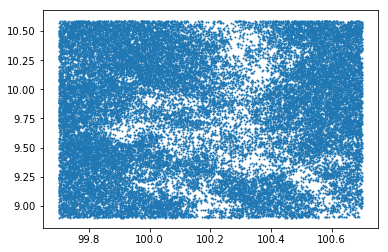

In [6]:
plt.scatter(RA,DE, s = 1)
plt.show()

In [7]:
X1 = np.zeros(num)
Y1 = np.zeros(num)
for i in range(0,num):
    X1[i] = RA[i]
    Y1[i] = DE[i]
X = np.column_stack((X1,Y1))
print(len(X))

34126


In [8]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5).fit(X)
distances,indices = nbrs.kneighbors(X)
print(distances)
print(indices)

[[ 0.          0.00985273  0.01164646  0.01209377  0.01327101]
 [ 0.          0.00610001  0.00758417  0.00985273  0.01252959]
 [ 0.          0.00330648  0.0076093   0.00950663  0.0110868 ]
 ..., 
 [ 0.          0.00337527  0.00771939  0.01093018  0.0126553 ]
 [ 0.          0.00333663  0.00501439  0.00665787  0.00783859]
 [ 0.          0.01126194  0.01524391  0.01533741  0.01536448]]
[[    0     1    21    20    22]
 [    1   158   157     0    22]
 [    2     5    60    64    65]
 ..., 
 [34123 34122 33777 34124 33776]
 [34124 33781 33779 33780 33778]
 [34125 34118 29728 34119 29206]]


(array([  1.24900000e+04,   1.53870000e+04,   4.80300000e+03,
          1.03600000e+03,   2.87000000e+02,   8.90000000e+01,
          2.90000000e+01,   3.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  5.38010200e-05,   2.48673243e-03,   4.91966384e-03,
          7.35259526e-03,   9.78552667e-03,   1.22184581e-02,
          1.46513895e-02,   1.70843209e-02,   1.95172523e-02,
          2.19501837e-02,   2.43831151e-02]),
 <a list of 10 Patch objects>)

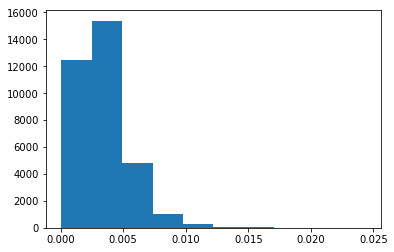

In [14]:
plt.hist(distances[:,1])

In [31]:
cat1 = np.array([])
cat2 = np.array([])
for i in range(len(X)):
    if distances[i,1] <= 0.004:
        if cat1.size == 0:
            cat1 = np.array([RA[i],DE[i]])
        else:
            cat1 = np.vstack((cat1,[RA[i],DE[i]]))
    if distances[i,1] > 0.004:
        if cat2.size == 0:
            cat2 = np.array([RA[i],DE[i]])
        else:
            cat2 = np.vstack((cat2,[RA[i],DE[i]]))


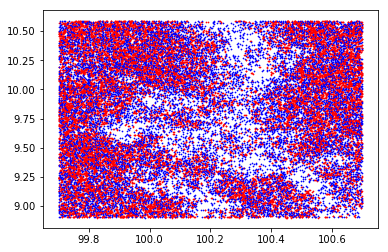

In [32]:
plt.scatter(cat1[:,0],cat1[:,1], s = 0.5, c = 'r')
plt.scatter(cat2[:,0],cat2[:,1], s = 0.5, c = 'b')
plt.show()

In [44]:
from scipy.spatial import cKDTree

tree = cKDTree(X)
imageSize = [1000,1000]
image = np.zeros(imageSize)
for x in range(0,imageSize[1]):
    for y in range(0,imageSize[0]):
        image[y,x] = tree.query([x,y])[0]

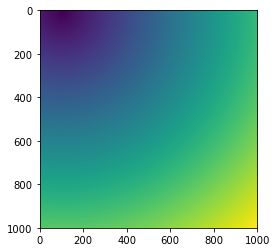

In [45]:
imgplot = plt.imshow(image)

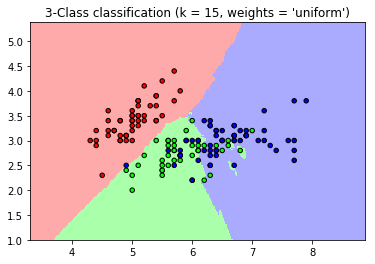

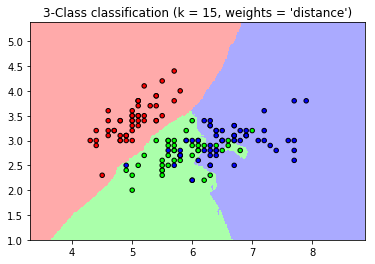

In [28]:
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()